<a href="https://colab.research.google.com/github/manisha-dhanuka/Linear-Regression/blob/main/Yes_Bank_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings                                  # `do not disturb` mode
warnings.filterwarnings('ignore')

In [3]:
#Importing auto Arima :
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 8.0 MB/s 
     |████████████████████████████████| 9.8 MB 39.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
#Importing the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Reading the file from drive:
df = pd.read_csv("/content/drive/MyDrive/data_YesBank_StockPrices.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [7]:
# To convert date into date- time object
from datetime import date
from datetime import datetime

In [8]:
#Redefining Date and set it as index:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y'))
df['Date']= pd.to_datetime(df['Date'])

#Setting Date as index:
df.set_index('Date',inplace = True)

# Changing into month end:
df = df.shift(periods = 1, freq = 'M')

# Setting frequency to month:
df.index.freq ='M'

In [9]:
df

,Open,High,Low,Close
Date,,,,
2005-07-31,13.00,14.00,11.25,12.46
2005-08-31,12.58,14.88,12.55,13.42
2005-09-30,13.48,14.87,12.27,13.30
2005-10-31,13.20,14.47,12.40,12.99
2005-11-30,13.35,13.88,12.88,13.41
...,...,...,...,...
2020-07-31,25.60,28.30,11.10,11.95
2020-08-31,12.00,17.16,11.85,14.37
2020-09-30,14.30,15.34,12.75,13.15


Thus, the data gives the stock prices of YES BANK from July 2005 to November 2020.


In [10]:
#Checking for the null values:
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [11]:
#Checking for the duplicate values:
df.duplicated().sum()

0

In [12]:
# For saving the plots:
from google.colab import files

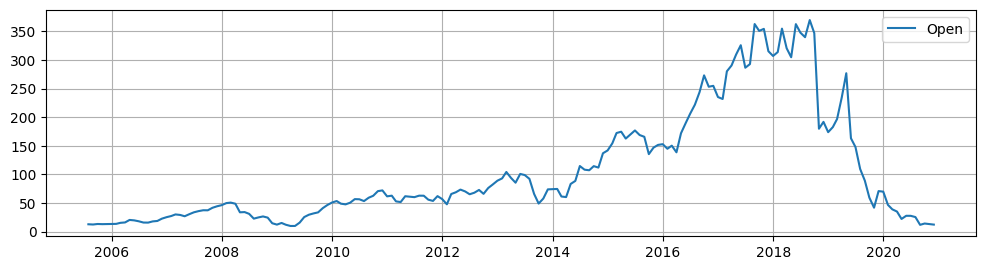

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

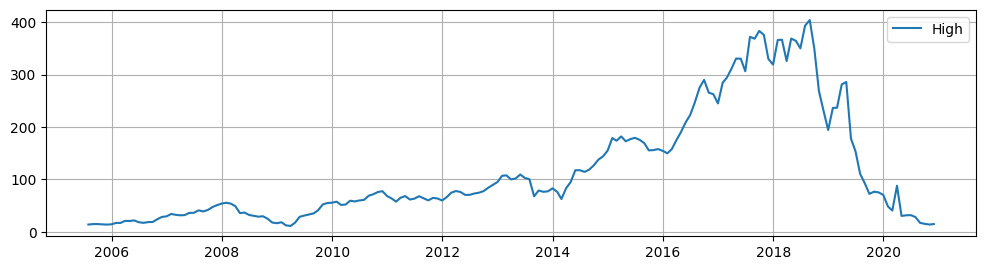

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

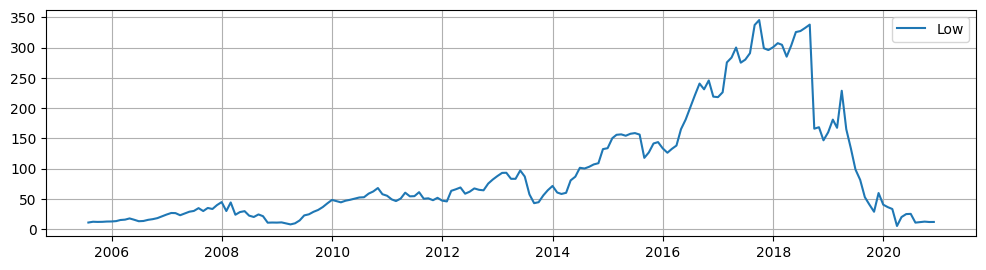

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

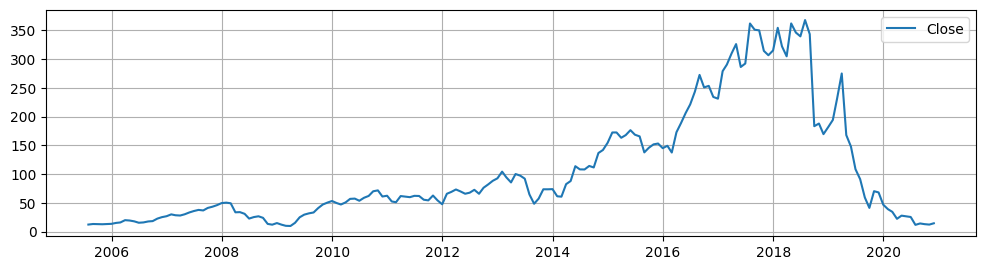

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [13]:
# Plotting the stock prices with respect to date:
for col in list(df.columns):
  fig = plt.figure(figsize=(12,3),dpi = 100)
  ax =plt.gca()
  ax.grid(True)
  ax.plot(df[col],label = col)
  ax.legend()
  plt.show()
  plt.savefig("fig1.png")
  files.download("fig1.png");

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

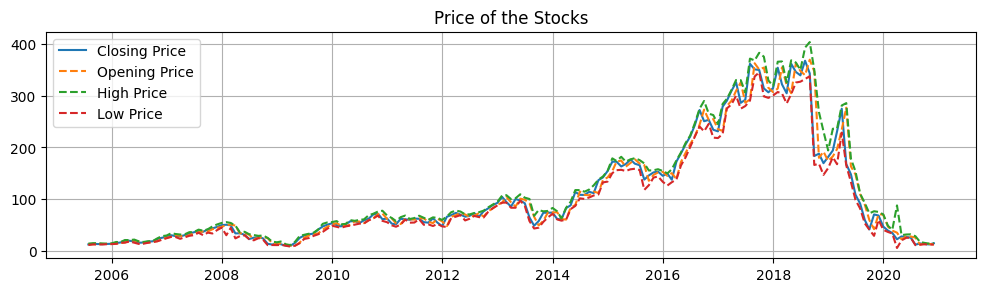

In [14]:
# Plotting in one graph:
plt.figure(figsize=(12, 3),dpi = 100)
plt.plot(df.Close,label = "Closing Price")
plt.plot(df.Open, label = "Opening Price",ls= '--')
plt.plot(df.High, label = "High Price",ls ='--')
plt.plot(df.Low, label = 'Low Price',ls = '--')
plt.title('Price of the Stocks')
plt.legend()
plt.grid(True)
plt.savefig("price.png")
files.download("price.png");
plt.show()

#Bivariate collinearity:

In [15]:
# Checking the correlation :
correlation = df.corr()

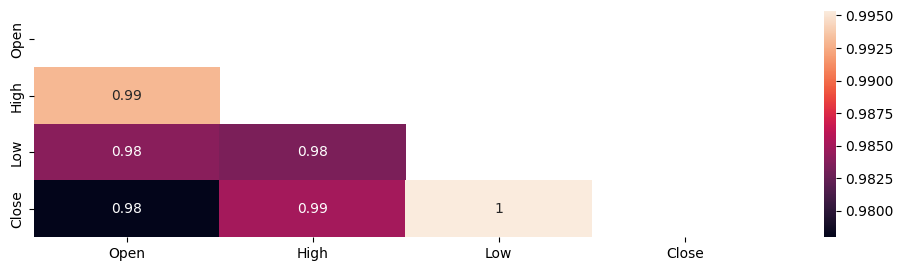

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [16]:
# Plotting Heatmap for visualisation:
plt.figure(figsize = (12,3),dpi = 100)
mask = np.triu(np.ones_like(correlation))
sns.heatmap(correlation, annot = True,mask = mask)
plt.show()
plt.savefig("corr.png")
files.download("corr.png");

# Multicollinearity:

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
# VIF dataframe
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns[:-1]
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1]-1)]

    return(vif)


In [19]:
print(calc_vif(df))

  variables         VIF
0      Open  288.504853
1      High  323.952468
2       Low  424.612257


# Observation:
Clearly, there is a high multivariate collinearity too. Dropping other columns except Close, which is our target variable.

In [20]:
stock_df = pd.DataFrame(df['Close'])

In [21]:
stock_df.head()

,Close
Date,
2005-07-31,12.46
2005-08-31,13.42
2005-09-30,13.30
2005-10-31,12.99
2005-11-30,13.41


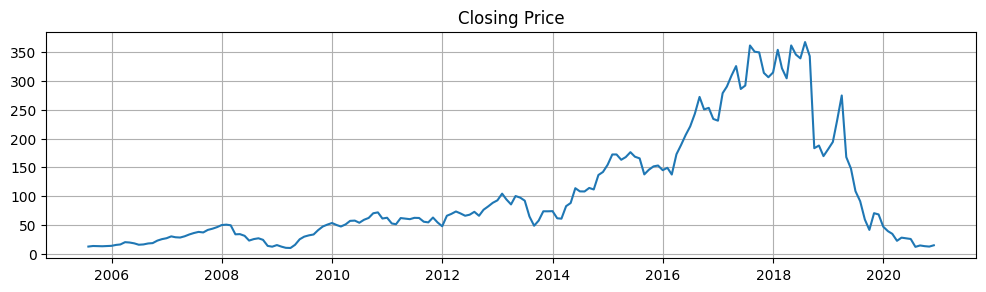

In [22]:
plt.figure(dpi = 100,figsize= (12,3))
plt.plot(stock_df)
plt.title('Closing Price')
plt.grid(True);


# Trend Analysis using rolling mean:



In [23]:
#Let us define the function for plotting the quarterly, half-yearly and yearly trend:
def plot_moving_average(series, window, ci= 1.96,plot_ci = False,plot_anomalies = False):
  plt.figure(figsize = (12,3),dpi = 100)
  
  plt.plot(series.rolling(window).mean(), label = 'Rolling Mean Trend')
  plt.plot(series, label = 'Actual Close Price',ls = 'dashdot')

  if plot_ci:
    # Calculating mean error, std of error
    roll_series = series.rolling(window).mean()
    mae = np.mean(np.abs(series[window:]-roll_series))
    std = np.std(series[window:]- roll_series)
    lower = roll_series - (mae + ci * std)
    upper = roll_series + (mae + ci * std)
    plt.plot(lower,ls = 'dashdot',c= 'green',label = 'confidence-intervals')
    plt.plot(upper, ls ='dashdot',c = 'green')


  if plot_anomalies:
    anomalies = pd.DataFrame(index=series.index, columns=series.columns)
    # Calculating mean error, std of error
    roll_series = series.rolling(window).mean()
    mae = np.mean(np.abs(series[window:]-roll_series))
    std = np.std(series[window:]- roll_series)
    lower = roll_series - (mae + ci * std)
    upper = roll_series + (mae + ci * std)
    anomalies[series<lower]= series[series<lower]
    anomalies[series>upper] = series[series>upper]
    print(anomalies.notnull().sum())
    
    plt.plot(anomalies, "ro", markersize=5)     # ro means red circle


  plt.title('Trends with window of {} months'.format(window))
  plt.legend()
  plt.grid(True)


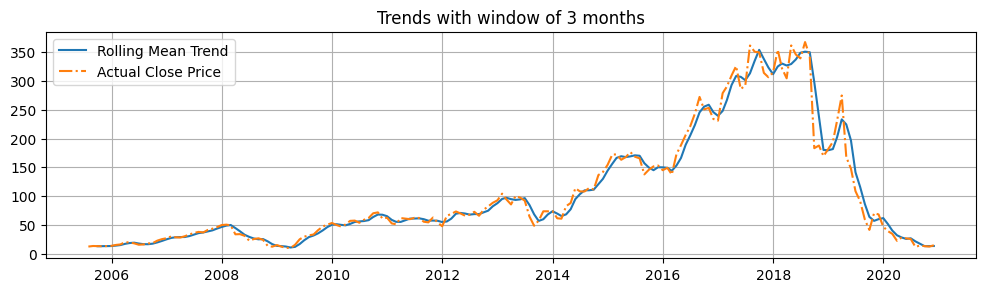

In [24]:
plot_moving_average(stock_df, 3)

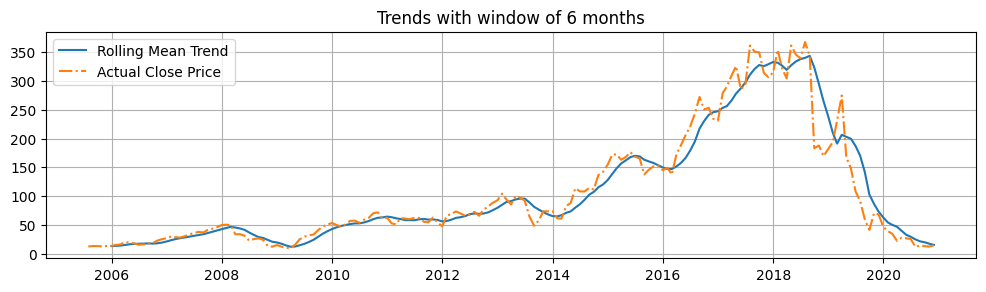

In [25]:
plot_moving_average(stock_df, 6)

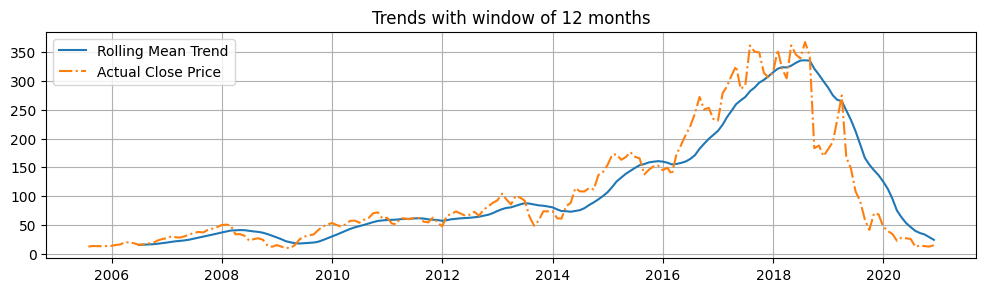

In [26]:
plot_moving_average(stock_df, 12)

Close    7
dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

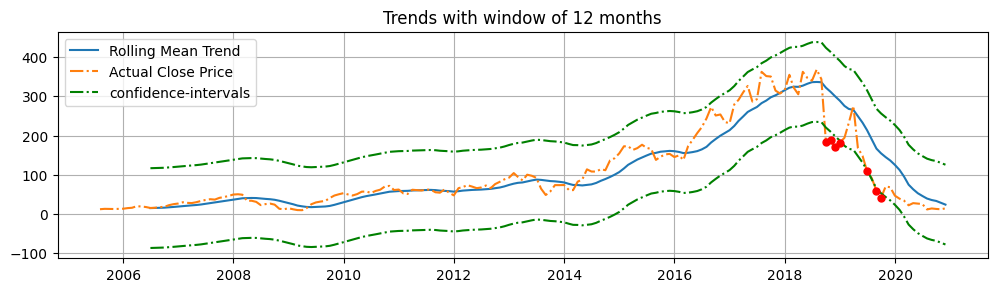

In [27]:
plot_moving_average(stock_df, 12, ci = 1.96, plot_ci = True, plot_anomalies = True)
plt.savefig("12-trend.png")
files.download("12-trend.png");

#Anomaly Detection:

In [28]:
# Using Isolation Forest to find the anomalies:
from sklearn.ensemble import IsolationForest

In [29]:
#Fitting isolation forest model to find anomalies in the data:

isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(stock_df['Close'].values.reshape(-1, 1))  
anomaly_df = stock_df.copy()    
anomaly_df['anomaly_score'] = isolation_forest.decision_function(stock_df['Close'].values.reshape(-1, 1))
anomaly_df['outlier'] = isolation_forest.predict(stock_df['Close'].values.reshape(-1, 1))

In [30]:
anomaly_df[anomaly_df['outlier']==-1]

,Close,anomaly_score,outlier
Date,,,
2018-07-31,367.9,-0.084984,-1


# Observations:
1. From graph it is evident there was in all increasing trend in the stock prices with dip in 2009 and after that in 2018-2019.
2. After 2016, there was a great rise in the price of the stock.
3.After dip of 2018, the prices increases for a brief period then dipped again till then there has not been a rise as per the data available.
4. Also, there are some instances where the value crosses the confidence interval.


# ETS Decomposition

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [32]:
# using multiplicative model, since the rise seems exponential 
result = seasonal_decompose(stock_df,model = 'multiplicative')


In [36]:
plt.plot?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

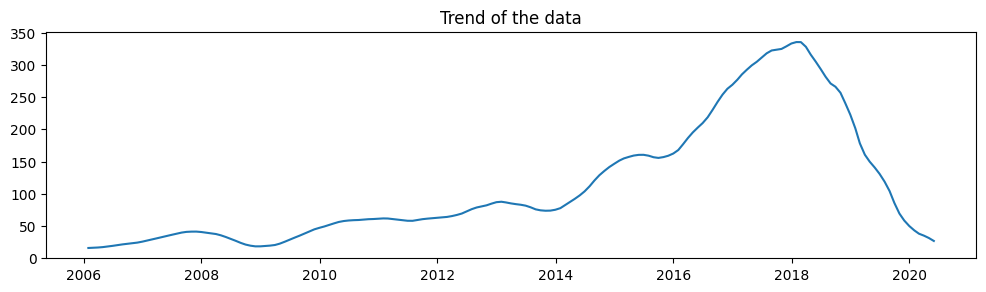

In [38]:
plt.figure(figsize= (12,3), dpi = 100)
plt.plot(result.trend)
plt.title('Trend of the data')
plt.savefig("ets_trend.png")
files.download("ets_trend.png");


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

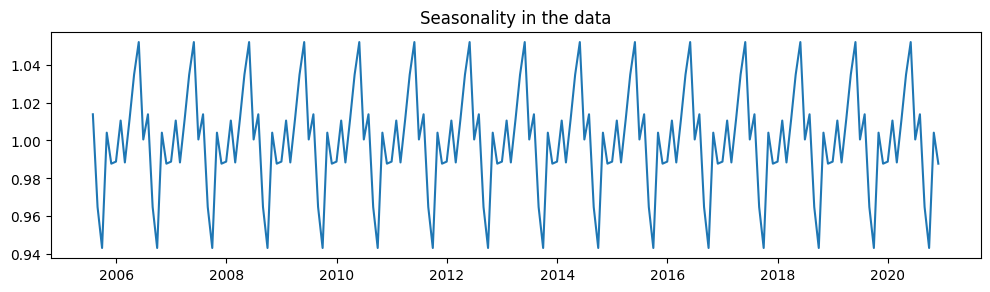

In [39]:
plt.figure(figsize= (12,3), dpi = 100)
plt.plot(result.seasonal)

plt.title('Seasonality in the data')
plt.savefig("ets_seasonal.png")
files.download("ets_seasonal.png");


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

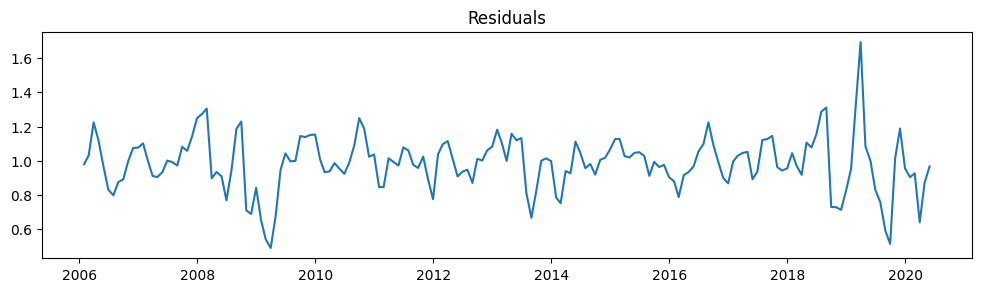

In [40]:
plt.figure(figsize= (12,3), dpi = 100)
plt.plot(result.resid)
plt.title('Residuals')
plt.savefig("ets_resid.png")
files.download("ets_resid.png");

## Clearly there are much more noises after 2018..which shows there was some outside factor that influenced the stock prices.

## Also, there is a seasonal factor.

# Holt winters Exponential Smoothing:

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [42]:
stock_df['Double_Exponential']= ExponentialSmoothing(stock_df.Close, trend='mul').fit().fittedvalues.shift(-1)

In [43]:
stock_df.head()

,Close,Double_Exponential
Date,,
2005-07-31,12.46,12.333995
2005-08-31,13.42,13.284279
2005-09-30,13.30,13.165511
2005-10-31,12.99,12.858649
2005-11-30,13.41,13.274391


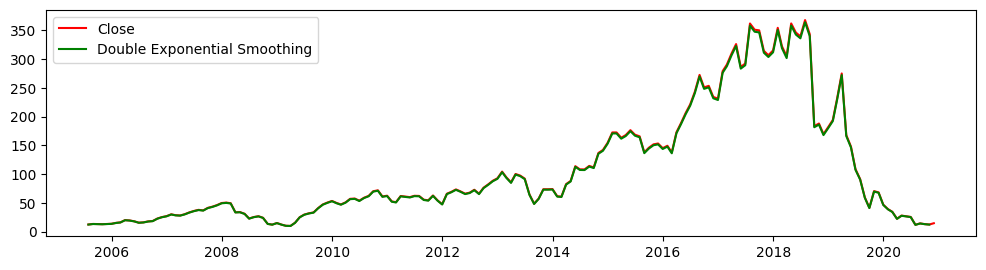

In [44]:
plt.figure(figsize = (12,3),dpi = 100)
plt.plot(stock_df['Close'],label = 'Close',c= 'r')
plt.plot(stock_df['Double_Exponential'],c= 'g',label = 'Double Exponential Smoothing')
plt.legend();


It seems that Double Exponential smoothing is able to understand the pattern.

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [46]:
stock_df = stock_df.drop('Double_Exponential',axis = 1)

In [47]:
def explore(test_predictions, test,train):
  # Metric Evaluation:
  abs_error = mean_absolute_error(test['Close'],test_predictions)
  rmse = np.sqrt(mean_squared_error(test['Close'],test_predictions))
  r2_Score = r2_score(test['Close'],test_predictions)

  #Metrics DataFrame:
  metric_df = pd.DataFrame(data = [abs_error,rmse,r2_Score],index = ['Absolute Error','RMSE','R2-Score'])
  print(metric_df)

  #Plotting the results:
  plt.figure(figsize =(12,3),dpi = 100)
  plt.plot(train['Close'],label = 'Train Data')
  plt.plot(test['Close'],label = 'Test Data')
  plt.plot(test_predictions, label = 'Test Predictions')
  plt.legend();

                        0
Absolute Error  42.025403
RMSE            43.218868
R2-Score       -14.204805


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

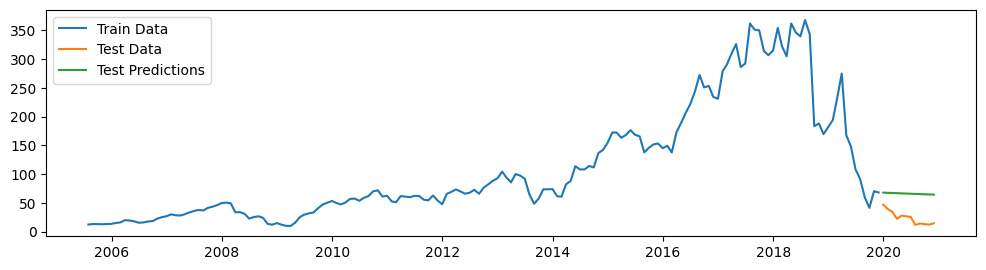

In [49]:
# Double exponential Smoothing model:
train = stock_df.iloc[:-12]
test = stock_df.iloc[-12:]
fitted_model = ExponentialSmoothing(train['Close'],trend='mul').fit()
test_predictions = fitted_model.forecast(12)
explore(test_predictions, test,train)
plt.savefig("des12.png")
files.download("des12.png")

                         0
Absolute Error  113.260289
RMSE            125.350823
R2-Score         -1.720090


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

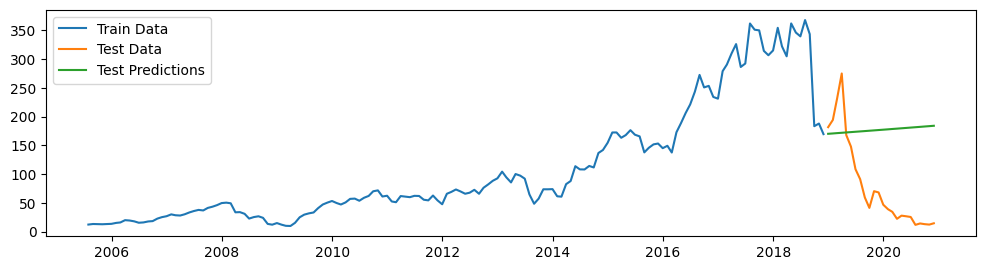

In [50]:
# Double exponential Smoothing model:
train = stock_df.iloc[:-24]
test = stock_df.iloc[-24:]
fitted_model = ExponentialSmoothing(train['Close'],trend='mul').fit()
test_predictions = fitted_model.forecast(24)
explore(test_predictions, test,train)
plt.savefig("des24.png")
files.download("des24.png")

# Observations:
1. The model is working better if data forecast is done for 12 months rather than 24 months.The reason could be absence of peaks in 12 month data.
2.From ETS decomposition it seems there is a seasonal factor too. Let us try fitting Triple Exponential and see if it works well or not.

                         0
Absolute Error  106.488183
RMSE            116.691502
R2-Score         -1.357259


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

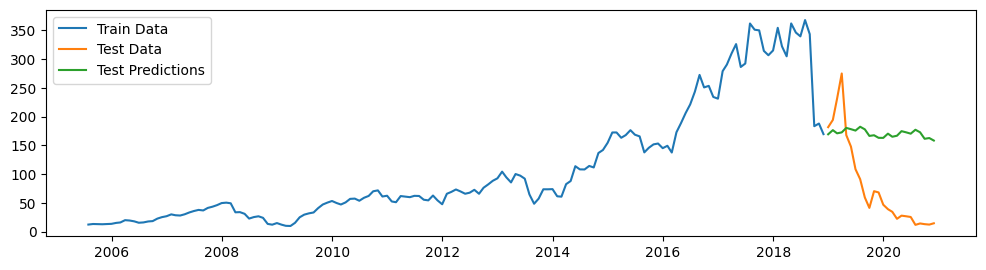

In [51]:
# Triple Exponential smoothing:
train = stock_df.iloc[:-24]
test = stock_df.iloc[-24:]
fitted_model_triple = ExponentialSmoothing(train['Close'],trend='mul',seasonal='add',seasonal_periods=12,damped = True).fit()
test_predictions_triple = fitted_model_triple.forecast(24)
explore(test_predictions_triple, test,train)
plt.savefig("tes24.png")
files.download("tes24.png")


                        0
Absolute Error  55.748011
RMSE            57.305570
R2-Score       -25.731771


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

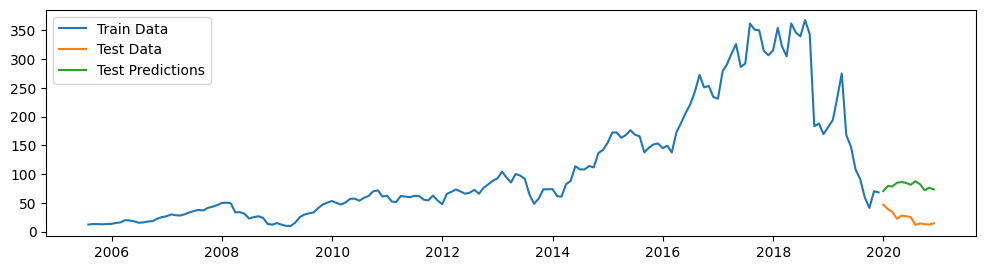

In [52]:
# Triple Exponential smoothing:
train = stock_df.iloc[:-12]
test = stock_df.iloc[-12:]
fitted_model_triple = ExponentialSmoothing(train['Close'],trend='mul',seasonal='add',seasonal_periods=12,damped = True).fit()
test_predictions_triple = fitted_model_triple.forecast(12)
explore(test_predictions_triple, test,train)
plt.savefig("tes12.png")
files.download("tes12.png")

So, this method does work well but has to tune everytime, there is a peak. So, can't be used for long term forecasting.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

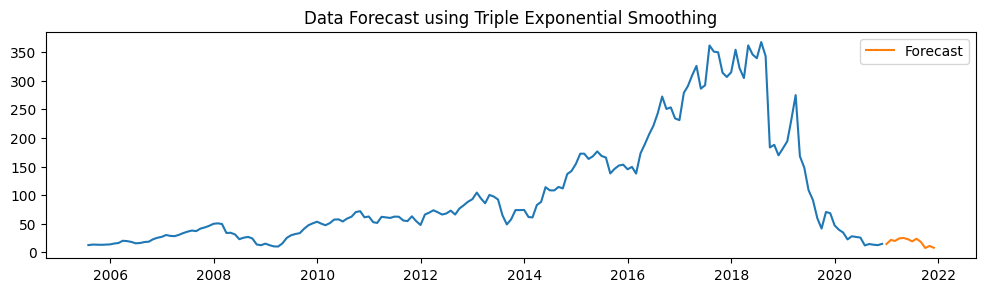

In [54]:
# Final exponential Model ---- using trend as additive model since reaching this point the drop will be less hence the additive.
fitted_model_triple = ExponentialSmoothing(stock_df['Close'],trend='add',seasonal='add',seasonal_periods=12,damped = True).fit()
forecast = fitted_model_triple.forecast(12)
plt.figure(figsize = (12,3), dpi = 100)
plt.plot(stock_df.Close)
plt.plot(forecast,label = 'Forecast')
plt.title("Data Forecast using Triple Exponential Smoothing")
plt.legend()
plt.savefig("tes_forecast.png")
files.download("tes_forecast.png");

In [55]:
Forecast_df = pd.DataFrame(forecast)
Forecast_df.columns=['Triple Exponential Smoothing']
Forecast_df.head()

,Triple Exponential Smoothing
2020-12-31,14.408774
2021-01-31,21.563437
2021-02-28,19.731701
2021-03-31,24.240173
2021-04-30,24.998496


# Checking For the stationarity of the time Series using Augmented Dickey Fuller Test

In [56]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [57]:
# Function to create ACF plot, PACF plot and AD-Fuller Result:
def plot_ad_fuller(series, lags= None):
  
  with plt.style.context('bmh'):
    fig = plt.figure(figsize =(12,7), dpi = 100)
    ts_ax = plt.subplot2grid(shape =(2,2),loc= (0,0), colspan = 2)
    pacf_ax = plt.subplot2grid(shape =(2,2),loc= (1,0))
    acf_ax = plt.subplot2grid(shape =(2,2),loc= (1,1))
    
    series.plot(ax= ts_ax)
    plot_pacf(series, ax= pacf_ax)
    plot_acf(series, ax= acf_ax)

    # Calculating p-value:
    p_value= round(adfuller(series)[1],5)
    if p_value > 0.05:
      x= 'Data is not stationary'
    else:
      x= 'Data is stationary'

    # Title:
    ts_ax.set_title('Augmented Dickey Fuller \n p-value = {} \n {}'.format(p_value, x))
    

    plt.tight_layout()

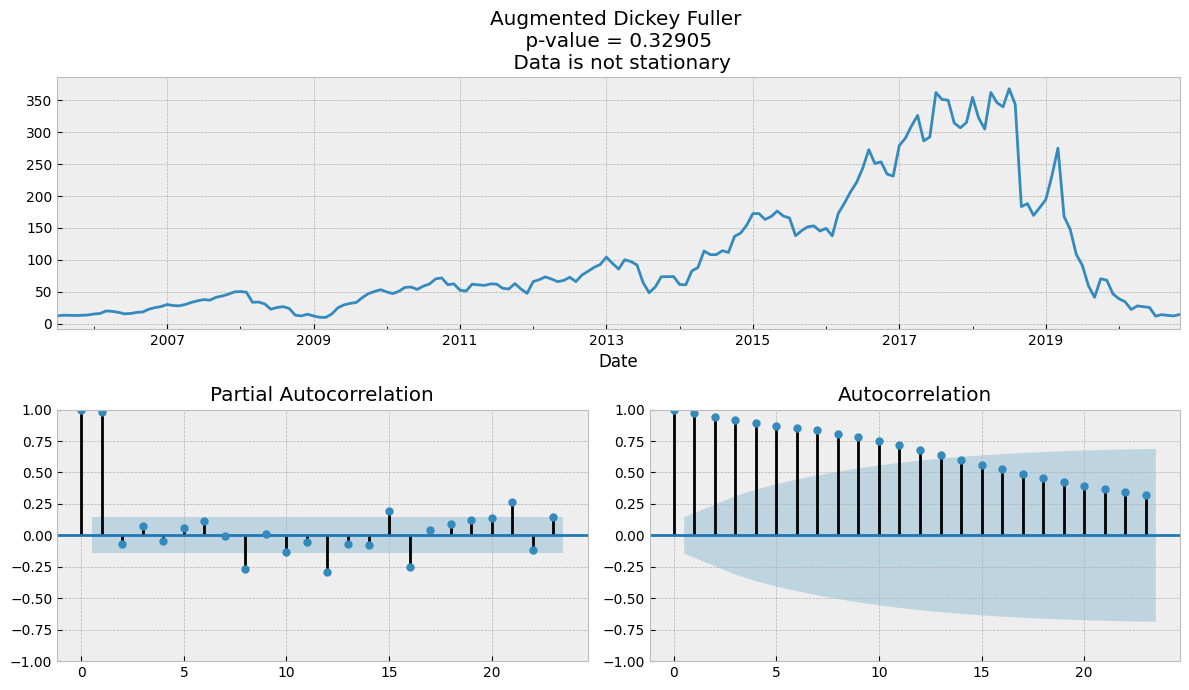

In [58]:
plot_ad_fuller(stock_df.Close)

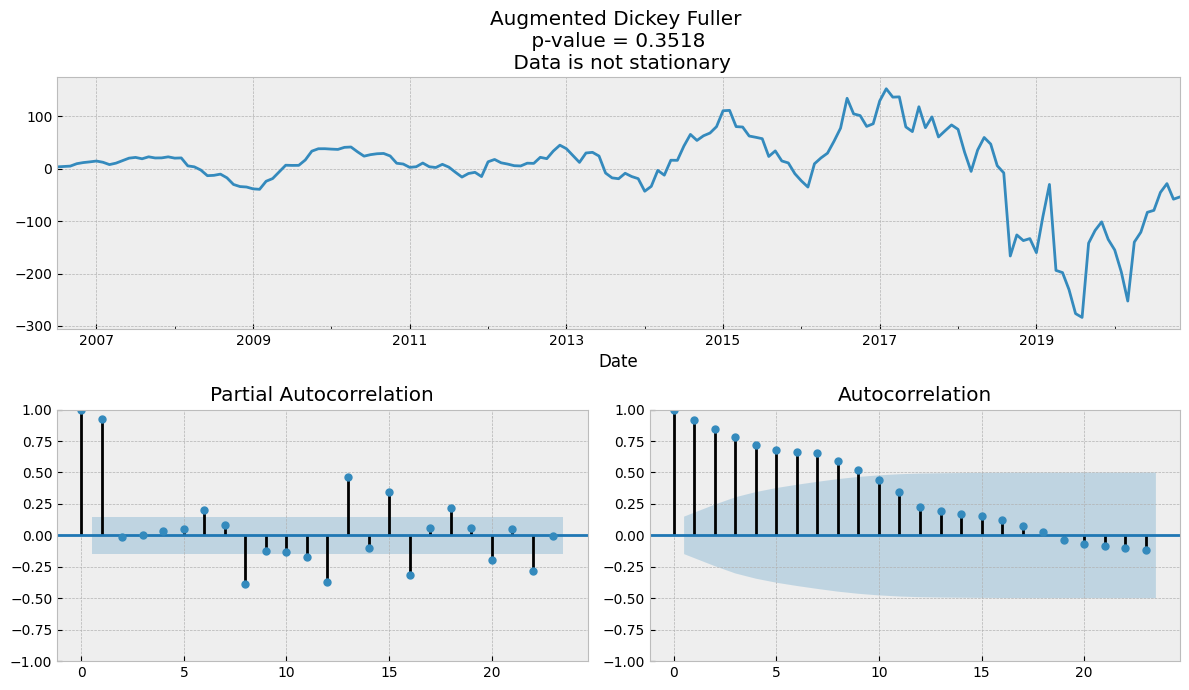

In [59]:
# Removing the seasonal factor:
plot_ad_fuller(stock_df.Close.diff(12).dropna())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

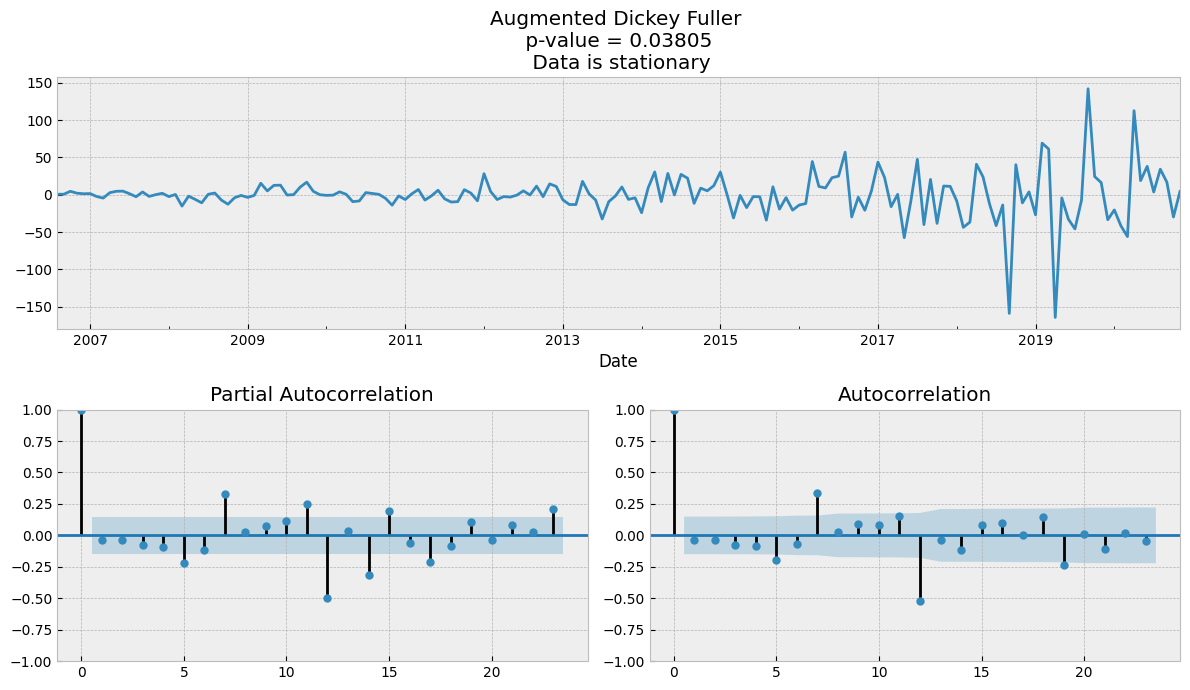

In [61]:
# First order difference for checking stationarity:
plot_ad_fuller(stock_df.Close.diff(12).diff().dropna())
plt.savefig("stationarity.png")
files.download("stationarity.png")

In [62]:
# Importing auto_arima for finding better p,d,q values:
from pmdarima import auto_arima


In [63]:
train = stock_df[:-24]
test = stock_df[-24:]

In [64]:
# Building SARIMA model using pmdarima
sarimax_model = auto_arima(train.Close, start_p=2, d=None, start_q=2, max_p=10, max_d=2, max_q=10, seasonal = True, m= 12,maxiter = 100)

In [65]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  161
Model:             SARIMAX(2, 1, 2)x(2, 0, [], 12)   Log Likelihood                -682.365
Date:                             Wed, 17 Aug 2022   AIC                           1378.730
Time:                                     16:31:52   BIC                           1400.257
Sample:                                          0   HQIC                          1387.471
                                             - 161                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9372      0.048    -19.343      0.000      -1.032      -0.842
ar.L2         -0.9679      0.057    -17.094      0.000      -1.079      -0.857
ma.L1          1.0622      0.077     13.857      0.000       0.912       1.212
ma.L2          0.9229      0.063     14.669      0.000       0.800       1.046
ar.S.L12      -0.0599      0.108     -0.553      0.580      -0.272       0.152
ar.S.L24       0.2791      0.149      1.878      0.060      -0.012       0.570
sigma2       286.5018     20.803     13.772      0.000     245.728     327.275
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):              2245.92
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):              47.42   Skew:                            -2.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  161
Model:             SARIMAX(2, 1, 2)x(2, 0, [], 12)   Log Likelihood                -682.365
Date:                             Wed, 17 Aug 2022   AIC                           1378.730
Time:                                     16:32:23   BIC                           1400.257
Sample:                                 07-31-2005   HQIC                          1387.471
                                      - 11-30-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9372      0.048    -19.343      0.000      -1.032      -0.842
ar.L2         -0.9679      

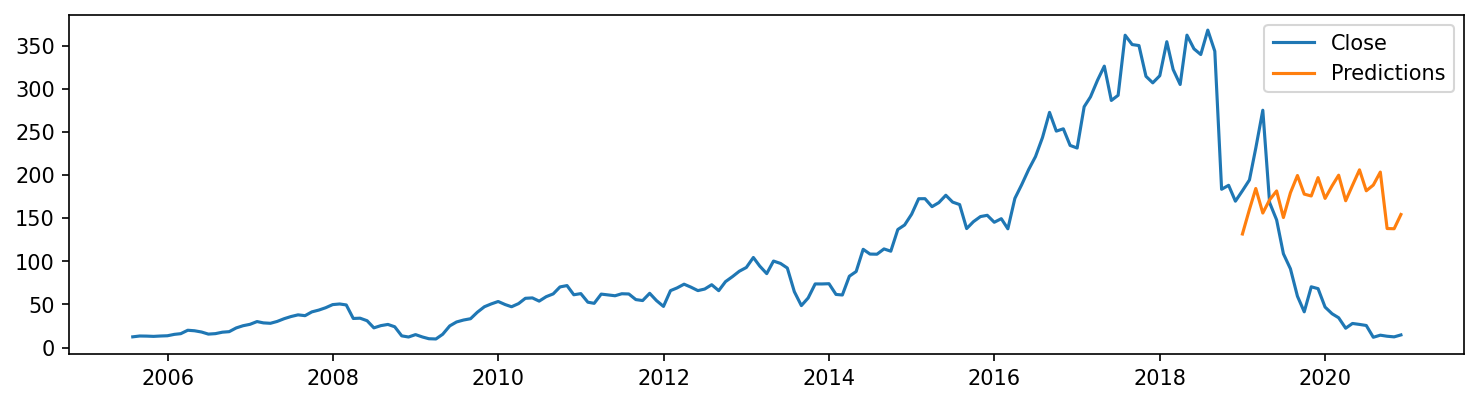

In [68]:
train = stock_df[:-24]
test = stock_df[-24:]


# Fitting the model:
model = SARIMAX(train['Close'],order = (2,1,2),seasonal_order =(2,0,0,12))
results = model.fit(maxiter = 1000)
print(results.summary())

start = len(train)
end = len(train)+len(test)-1
test_predictions = results.predict(start = start, end = end).rename('Test Predictions')

abs_error = mean_absolute_error(test['Close'],test_predictions)
rmse = np.sqrt(mean_squared_error(test['Close'],test_predictions))
r2_Score = r2_score(test['Close'],test_predictions)

#Metrics DataFrame:
metric_df = pd.DataFrame(data = [abs_error,rmse,r2_Score],index = ['Absolute Error','RMSE','R2-Score'])
print(metric_df)

# Plotting:
plt.figure(figsize = (12,3), dpi = 150)

plt.plot(stock_df.Close,label = 'Close')
plt.plot(test_predictions,label = 'Predictions')
plt.legend();


The SARIMAX model is also not able to predict the stock prices better But the reason again could be the peaks and drops.

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  173
Model:             SARIMAX(2, 1, 2)x(2, 0, [], 12)   Log Likelihood                -762.563
Date:                             Wed, 17 Aug 2022   AIC                           1539.126
Time:                                     16:32:46   BIC                           1561.158
Sample:                                 07-31-2005   HQIC                          1548.065
                                      - 11-30-2019                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2821      1.030     -0.274      0.784      -2.301       1.737
ar.L2          0.4187      

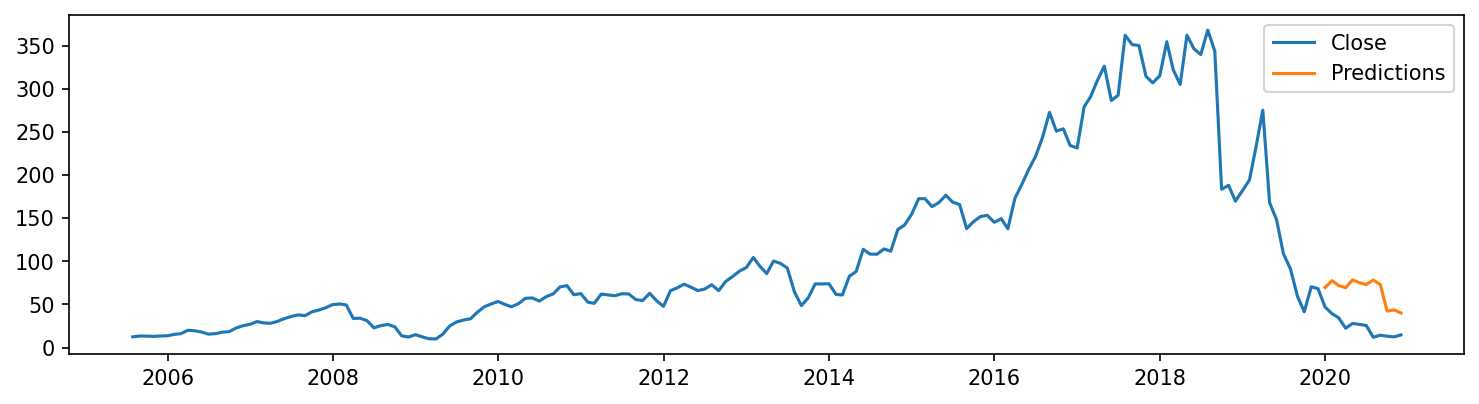

In [69]:
train = stock_df[:-12]
test = stock_df[-12:]


# Fitting the model:
model = SARIMAX(train['Close'],order = (2,1,2),seasonal_order =(2,0,0,12))
results = model.fit(maxiter = 1000)
print(results.summary())

start = len(train)
end = len(train)+len(test)-1
test_predictions = results.predict(start = start, end = end).rename('Test Predictions')


# Metric Evaluation:
abs_error = mean_absolute_error(test['Close'],test_predictions)
rmse = np.sqrt(mean_squared_error(test['Close'],test_predictions))
r2_Score = r2_score(test['Close'],test_predictions)

#Metrics DataFrame:
metric_df = pd.DataFrame(data = [abs_error,rmse,r2_Score],index = ['Absolute Error','RMSE','R2-Score'])
print(metric_df)

# Plotting:
plt.figure(figsize = (12,3), dpi = 150)

plt.plot(stock_df.Close,label = 'Close')
plt.plot(test_predictions,label = 'Predictions')
plt.legend();


Thus, it works well if predict for a shorter period. Let us predict it to the entire model and then forecast for the future values.

## As per pmdarima seasonal difference factor is 0 but that seems inconsistent with the idea that data becomes stationary only after we subtract that factor. So, manually checking the values using loop and finding the best fit value.

In [70]:
from itertools import product                   # some useful functions
from tqdm import tqdm_notebook

In [71]:
ps = range(7, 12)
d=1 
qs = range(7, 10)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 12 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

60

In [72]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=SARIMAX(stock_df.Close, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1,maxiter = 1000)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [73]:
result_table = optimizeSARIMA(parameters_list, 1, 1, 12)

  0%|          | 0/60 [00:00<?, ?it/s]

In [74]:
result_table

,parameters,aic
0,"(11, 8, 0, 1)",1541.405606
1,"(11, 8, 1, 1)",1542.929668
2,"(7, 7, 0, 1)",1543.159071
3,"(8, 7, 0, 1)",1543.326279
4,"(11, 9, 0, 1)",1543.404591
5,"(9, 9, 0, 1)",1543.665766
6,"(11, 7, 1, 1)",1543.769792
7,"(9, 8, 1, 1)",1544.843004
8,"(10, 9, 0, 1)",1544.849919
9,"(8, 7, 1, 1)",1545.138972


                                       SARIMAX Results                                       
Dep. Variable:                                 Close   No. Observations:                  173
Model:             SARIMAX(11, 1, 8)x(0, 1, [1], 12)   Log Likelihood                -697.980
Date:                               Wed, 17 Aug 2022   AIC                           1437.959
Time:                                       17:16:45   BIC                           1502.538
Sample:                                   07-31-2005   HQIC                          1464.183
                                        - 11-30-2019                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7677      0.203     -3.787      0.000      -1.165      -0.370
ar.L2      

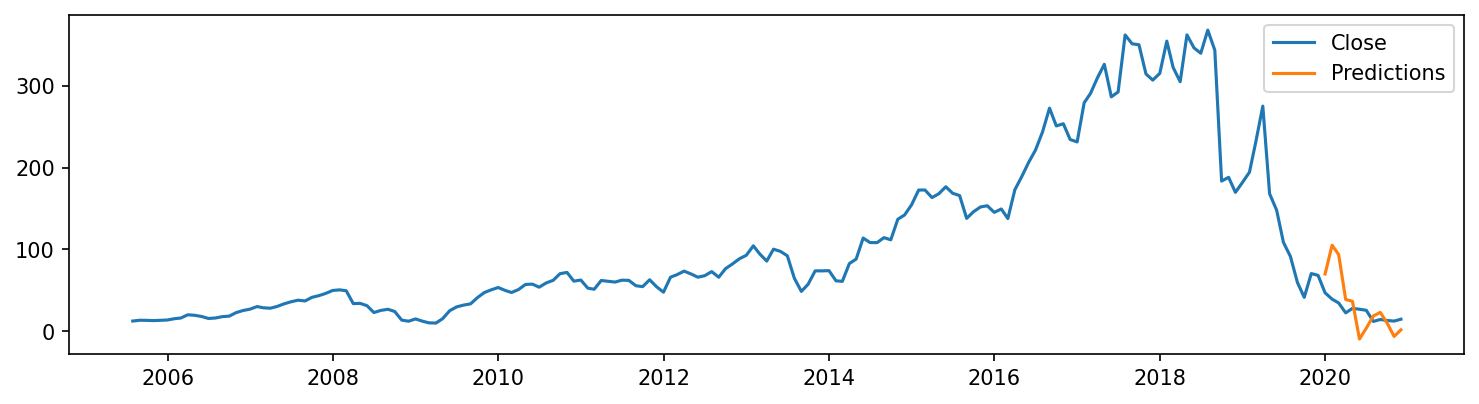

In [75]:
train = stock_df[:-12]
test = stock_df[-12:]


# Fitting the model:
model = SARIMAX(train['Close'],order = (11,1,8),seasonal_order =(0,1,1,12))
results = model.fit(maxiter = 1000)
print(results.summary())

start = len(train)
end = len(train)+len(test)-1
test_predictions = results.predict(start = start, end = end).rename('Test Predictions')

#Metric Evaluation:
abs_error = mean_absolute_error(test['Close'],test_predictions)
rmse = np.sqrt(mean_squared_error(test['Close'],test_predictions))
r2_Score = r2_score(test['Close'],test_predictions)

#Metrics DataFrame:
metric_df = pd.DataFrame(data = [abs_error,rmse,r2_Score],index = ['Absolute Error','RMSE','R2-Score'])
print(metric_df)

# Plotting:
plt.figure(figsize = (12,3), dpi = 150)

plt.plot(stock_df.Close,label = 'Close')
plt.plot(test_predictions,label = 'Predictions')
plt.legend();

Checking for the order(7,7,0,1) also, since aic is comparable to the first one but the complexity is less.

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  173
Model:             SARIMAX(7, 1, 7)x(0, 1, [1], 12)   Log Likelihood                -705.534
Date:                              Wed, 17 Aug 2022   AIC                           1443.067
Time:                                      17:17:38   BIC                           1492.270
Sample:                                  07-31-2005   HQIC                          1463.047
                                       - 11-30-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1645      0.291     -0.566      0.571      -0.734       0.405
ar.L2          0.50

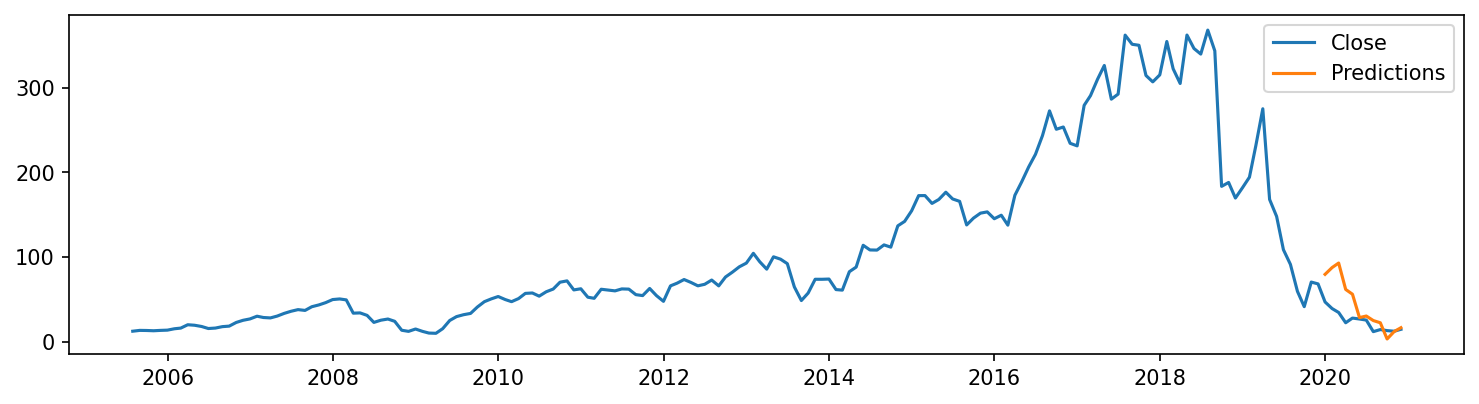

In [76]:
train = stock_df[:-12]
test = stock_df[-12:]


# Fitting the model:
model = SARIMAX(train['Close'],order = (7,1,7),seasonal_order =(0,1,1,12))
results = model.fit(maxiter = 1000)
print(results.summary())

start = len(train)
end = len(train)+len(test)-1
test_predictions = results.predict(start = start, end = end).rename('Test Predictions')

#Metric Evaluation:
abs_error = mean_absolute_error(test['Close'],test_predictions)
rmse = np.sqrt(mean_squared_error(test['Close'],test_predictions))
r2_Score = r2_score(test['Close'],test_predictions)

#Metrics DataFrame:
metric_df = pd.DataFrame(data = [abs_error,rmse,r2_Score],index = ['Absolute Error','RMSE','R2-Score'])
print(metric_df)

# Plotting:
plt.figure(figsize = (12,3), dpi = 150)

plt.plot(stock_df.Close,label = 'Close')
plt.plot(test_predictions,label = 'Predictions')
plt.legend();

##Thus, this model works better than the model predicted by pmdarima model.

In [77]:
residuals = test.Close-test_predictions

In [78]:
residuals

Date
2019-12-31   -32.642057
2020-01-31   -48.381092
2020-02-29   -58.383800
2020-03-31   -39.308528
2020-04-30   -28.166851
2020-05-31    -1.649437
2020-06-30    -4.778437
2020-07-31   -13.080997
2020-08-31    -8.036772
2020-09-30     9.865847
2020-10-31     0.427638
2020-11-30    -1.899873
Freq: M, dtype: float64

In [79]:
residuals.mean()

-18.836196587281492

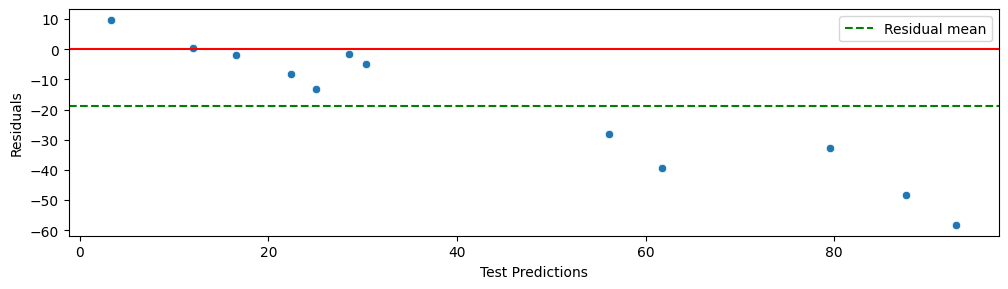

In [81]:
plt.figure(figsize = (12,3),dpi= 100)
sns.scatterplot(test_predictions,residuals)
plt.xlabel('Test Predictions')
plt.ylabel('Residuals')
plt.axhline(y= 0,c = 'r')
plt.axhline(y= residuals.mean(),ls ='dashed',c = 'g',label = 'Residual mean')
plt.legend();

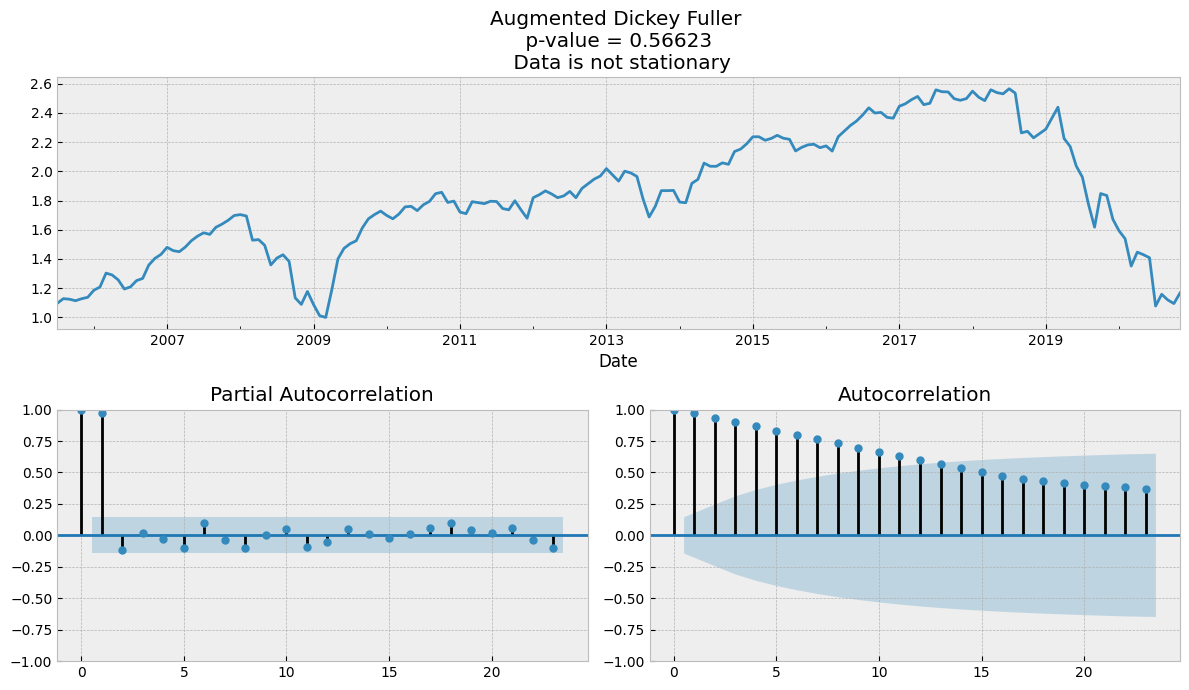

In [82]:
plot_ad_fuller(np.log10(stock_df.Close))

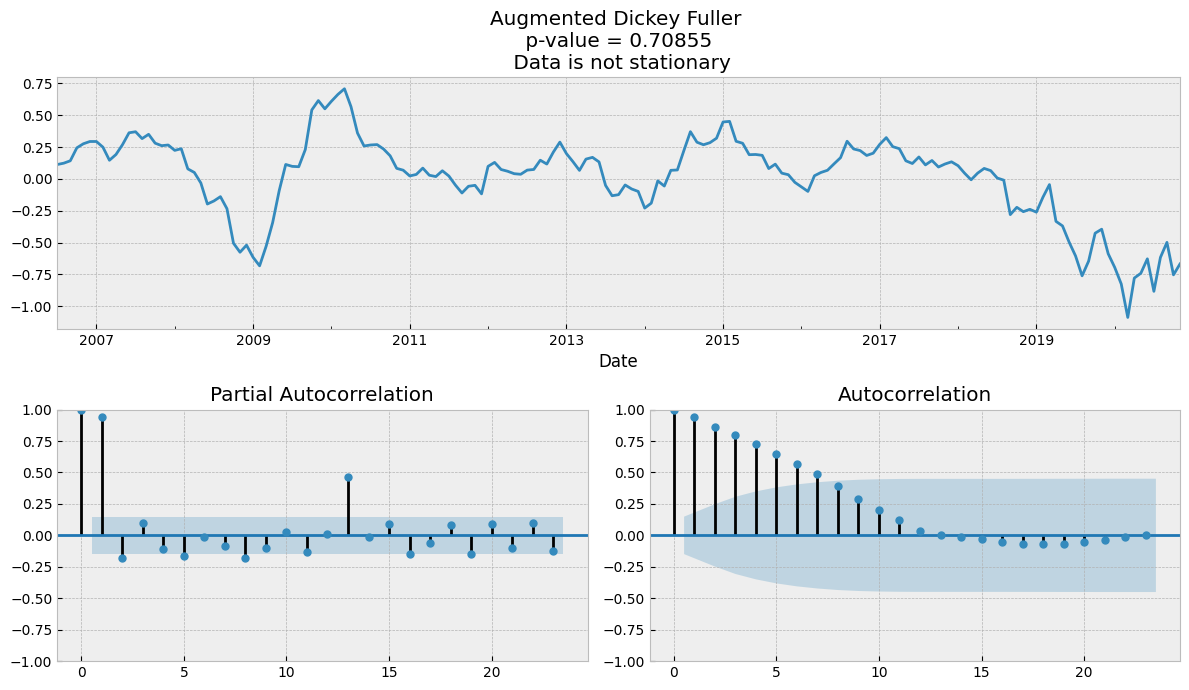

In [83]:
plot_ad_fuller(np.log10(stock_df.Close).diff(12).dropna())

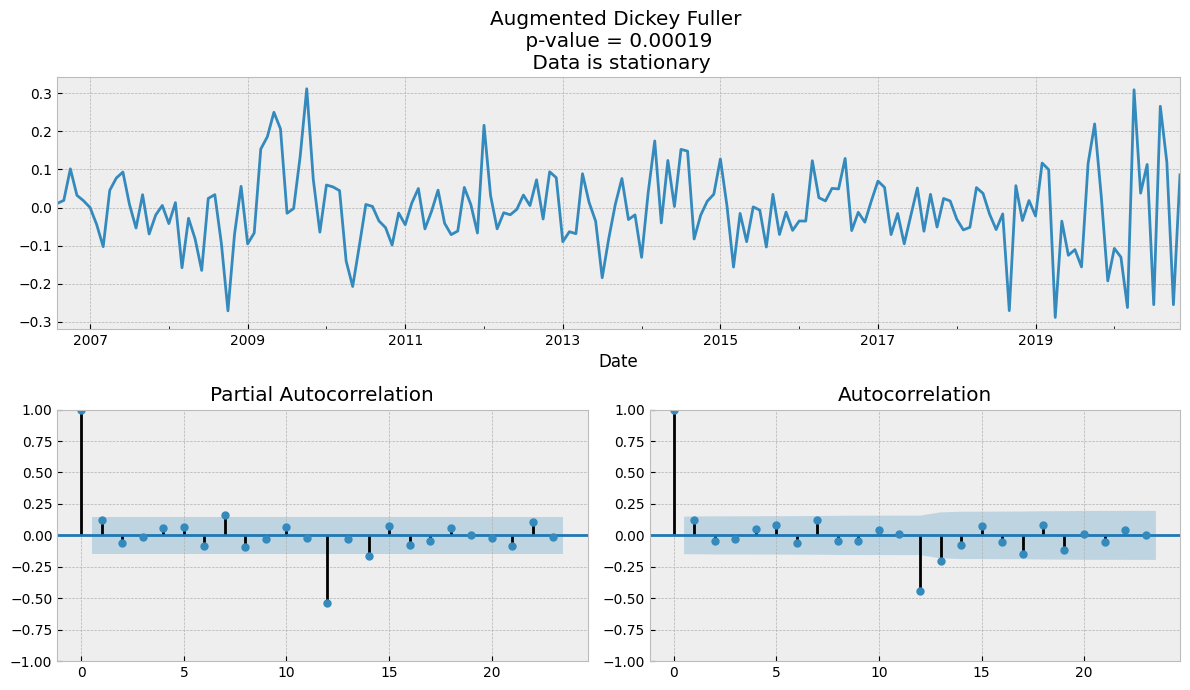

In [84]:
plot_ad_fuller(np.log10(stock_df.Close).diff(12).diff().dropna())

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  173
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                 159.819
Date:                             Wed, 17 Aug 2022   AIC                           -313.637
Time:                                     17:36:16   BIC                           -304.412
Sample:                                 07-31-2005   HQIC                          -309.891
                                      - 11-30-2019                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0292      0.267      0.110      0.913      -0.493       0.552
ma.L1          0.2416      

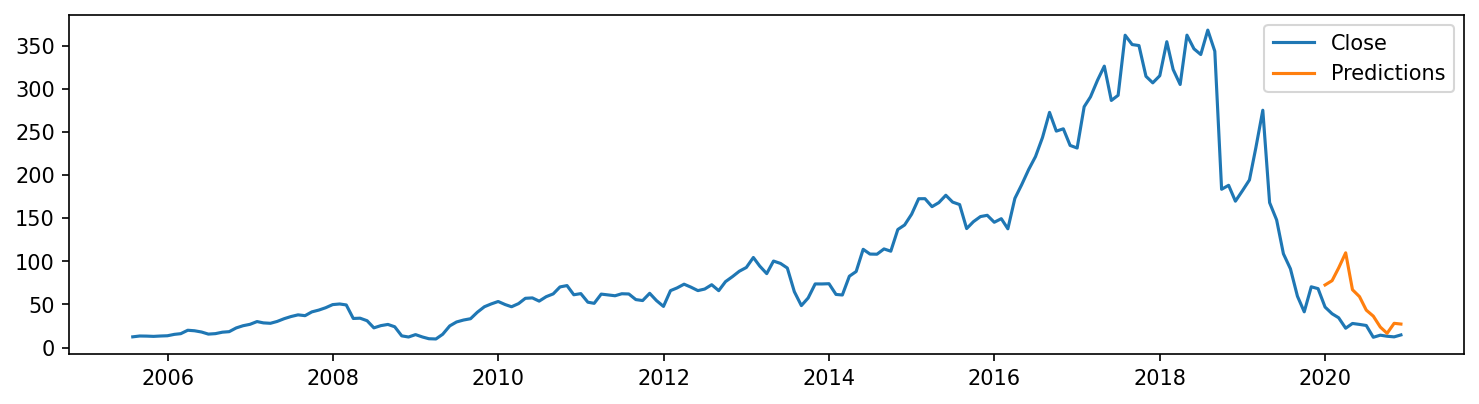

In [107]:
train = np.log10(stock_df[:-12])
test = np.log10(stock_df[-12:])


# Fitting the model:
model = SARIMAX(train['Close'],order = (1,1,1),seasonal_order =(0,1,0,12))
results = model.fit(maxiter = 1000)
print(results.summary())

start = len(train)
end = len(train)+len(test)-1
test_predictions = results.predict(start = start, end = end).rename('Test Predictions')

# Plotting:
plt.figure(figsize = (12,3), dpi = 150)

plt.plot(stock_df.Close,label = 'Close')
plt.plot(10**(test_predictions),label = 'Predictions')
plt.legend();

In [108]:
mean_absolute_error(10**test,10**test_predictions)

30.316286051528056

In [109]:
np.sqrt(mean_squared_error(10**test,10**test_predictions))

37.73091251775508

In [110]:
residuals = 10**(test.Close)-10**test_predictions

In [111]:
residuals

Date
2019-12-31   -25.624429
2020-01-31   -38.367173
2020-02-29   -57.747502
2020-03-31   -87.352866
2020-04-30   -39.117375
2020-05-31   -32.213203
2020-06-30   -17.794188
2020-07-31   -24.497925
2020-08-31    -9.383029
2020-09-30    -3.397278
2020-10-31   -15.704384
2020-11-30   -12.596082
Freq: M, dtype: float64

In [113]:
residuals.mean()

-30.316286051528056

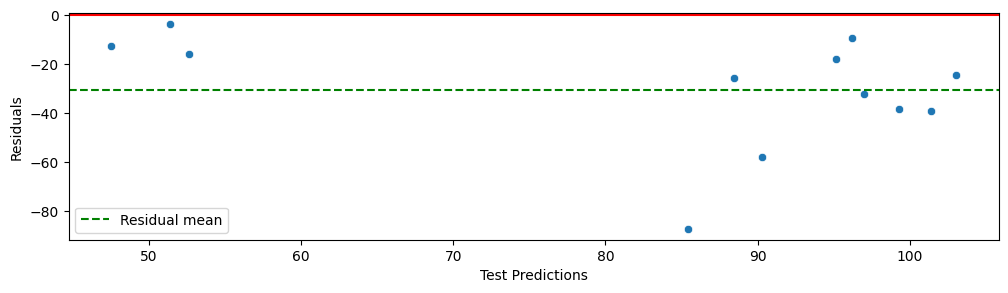

In [112]:
# Residual plotting to check for heteroscedasticity after applying log transformation:
plt.figure(figsize = (12,3),dpi= 100)
sns.scatterplot(10**predictions,residuals)
plt.xlabel('Test Predictions')
plt.ylabel('Residuals')
plt.axhline(y= 0,c = 'r')
plt.axhline(y= residuals.mean(),ls ='dashed',c = 'g',label = 'Residual mean')
plt.legend();

## Thus, after applying log trasnfromation, heteroscedasticity decreased but it is still there which is because of the very nature of the stock prices, ALso, error increased .


In [115]:
# Forecasting on the basis of sarimax model without log transformation:
model = SARIMAX(stock_df.Close,order = (7,1,7),seasonal_order =(0,1,1,12))
results = model.fit(maxiter = 1000)


start = len(stock_df)
end = len(stock_df)+12
Forecast_df['SARIMAX MODEL'] = results.predict(start = start, end = end)
Forecast_df

,Triple Exponential Smoothing,SARIMAX MODEL
2020-12-31,14.408774,16.153358
2021-01-31,21.563437,33.061544
2021-02-28,19.731701,31.636519
2021-03-31,24.240173,51.160990
2021-04-30,24.998496,46.583443
2021-05-31,22.807121,47.165874
2021-06-30,19.035046,38.838475
2021-07-31,23.580610,48.987148
2021-08-31,18.038265,39.109367
2021-09-30,7.444127,17.453378


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

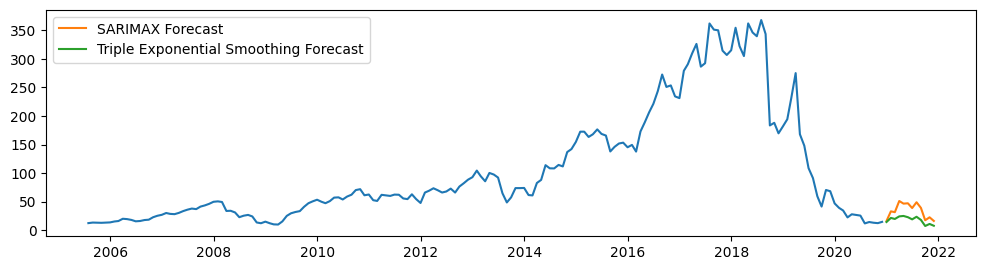

In [126]:
plt.figure(figsize = (12,3),dpi = 100)
plt.plot(stock_df['Close'])
plt.plot(Forecast_df['SARIMAX MODEL'],label= 'SARIMAX Forecast')
plt.plot(Forecast_df['Triple Exponential Smoothing'],label = 'Triple Exponential Smoothing Forecast')
plt.legend()
plt.savefig("final.png")
files.download("final.png");